In [6]:
import pandas as pd
import numpy as np
#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
malData=pd.read_csv("MalwareData.csv",sep="|",low_memory = True)

In [8]:
X = malData.drop(['Name','md5','legitimate'],axis=1).values
y = malData['legitimate'].values

In [9]:
malData.shape

(138047, 57)

In [10]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [11]:
malData.groupby(malData['legitimate']).size() #feature selection

legitimate
0    96724
1    41323
dtype: int64

In [12]:
legit=malData[0:41323].drop(["legitimate"],axis=1)
mal = malData[41323::].drop(["legitimate"],axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("the shape of the mal dataset is: %s samples, %s features"%(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
the shape of the mal dataset is: 96724 samples, 56 features


## Data Cleaning

In [13]:
y=malData["legitimate"]
malData=malData.drop(['legitimate'],axis=1)
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)

## Data splitting

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(malData,y,test_size=0.2,random_state=42)
X_train.shape

(110437, 54)

## Model Building

## *1. Random Forest*

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf=RandomForestClassifier(max_depth=2,random_state=0)
randomModel=clf.fit(X_train,y_train)
from sklearn.metrics import f1_score,accuracy_score,plot_confusion_matrix,auc,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
#Accuracy on the train dataset
train_pred=randomModel.predict(X_train)
accuracy_score(y_train,train_pred)

0.9828318407780001

In [17]:
#Accuracy on the test dataset
prediction=randomModel.predict(X_test)
accuracy_score(y_test,prediction)

0.9838102136906918

In [18]:
f1_score(y_test,prediction)

0.9730933606212002

### CONFUSION MATRIX

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (10).

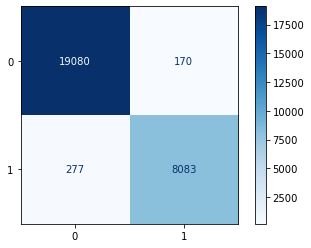

In [19]:
titles_options = [("Confusion matrix,without normalization",None),("Normalized confusion matrix",'true')]
for title, normalize in titles_options:
    disp =  plot_confusion_matrix(randomModel, X_test, y_test,display_labels="legitimate",cmap=plt.cm.Blues,normalize=normalize,)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    plt.show()

## *2. Neural Network*

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#define model
model = Sequential()
model.add(Dense(16, input_dim=54, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()#print model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [22]:
#compile model
model.compile(loss="binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

## Model Evaluation

In [23]:
#Fit MODEL
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 2s 437us/step - loss: 17133568.0000 - accuracy: 0.9359
Epoch 2/5
3452/3452 [==============================] - 2s 439us/step - loss: 13093653.0000 - accuracy: 0.9365
Epoch 3/5
3452/3452 [==============================] - 2s 440us/step - loss: 8155174.0000 - accuracy: 0.9118
Epoch 4/5
3452/3452 [==============================] - 2s 440us/step - loss: 6970629.0000 - accuracy: 0.9251
Epoch 5/5
3452/3452 [==============================] - 2s 441us/step - loss: 4602628.5000 - accuracy: 0.9414


In [24]:
#Accuracy on the training dataset
trainPred=model.predict(X_train)
trainPred=[1 if y>=0.5 else 0 for y in trainPred]
accuracy_score(y_train, trainPred)

0.9511667285420647

In [25]:
#Accuracy on the test dataset
y_prediction=model.predict(X_test)
y_prediction=[1 if y>=0.5 else 0 for y in y_prediction]
accuracy_score(y_test, y_prediction)

0.9531329228540384

In [26]:
confusion_matrix(y_test,y_prediction)

array([[18944,   306],
       [  988,  7372]], dtype=int64)

In [27]:
f1_score(y_test,y_prediction)

0.9193166230203268

In [28]:
import pandas
import numpy
import sklearn.ensemble as ek
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = { "DecisionTree":tree.DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(), "K Nearest Neighbour": KNeighborsClassifier(),
         "LinearRegression":LinearRegression()}

In [30]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9913074972835929 
RandomForest : 0.9951466859833393 
Adaboost : 0.9874320898225281 
GradientBoosting : 0.9899674031148135 
GNB : 0.6972473741398044 
K Nearest Neighbour : 0.9882289025715321 
LinearRegression : 0.5987003376261211 


In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
df=pd.read_csv('MalwareData.csv',sep='|')
df=df.drop(['Name','md5'],axis=1)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
df.shape

(138047, 55)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape
X_test.shape

(27610, 54)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

result1 = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(result1) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred) )

Confusion Matrix :
[[19377     0]
 [ 8233     0]]
Accuracy Score : 0.7018109380659181
Report : 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     19377
           1       0.00      0.00      0.00      8233

    accuracy                           0.70     27610
   macro avg       0.35      0.50      0.41     27610
weighted avg       0.49      0.70      0.58     27610



C:\Users\Oishi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred1=nb.predict(X_test)

result2 = confusion_matrix(y_test, y_pred1) 
print('Confusion Matrix :')
print(result2) 
print('Accuracy Score :',accuracy_score(y_test, y_pred1))
print('Report : ')
print(classification_report(y_test, y_pred1))

Confusion Matrix :
[[19377     0]
 [ 8233     0]]
Accuracy Score : 0.7018109380659181
Report : 
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     19377
           1       0.00      0.00      0.00      8233

    accuracy                           0.70     27610
   macro avg       0.35      0.50      0.41     27610
weighted avg       0.49      0.70      0.58     27610



C:\Users\Oishi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)

result3 = confusion_matrix(y_test, y_pred2) 
print('Confusion Matrix :')
print(result3) 
print('Accuracy Score :',accuracy_score(y_test, y_pred2))
print('Report : ')
print(classification_report(y_test, y_pred2))

Confusion Matrix :
[[19153   224]
 [  147  8086]]
Accuracy Score : 0.9865628395508873
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19377
           1       0.97      0.98      0.98      8233

    accuracy                           0.99     27610
   macro avg       0.98      0.99      0.98     27610
weighted avg       0.99      0.99      0.99     27610



In [36]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(X_train,y_train)
y_pred3=tr.predict(X_test)

result4 = confusion_matrix(y_test, y_pred3) 
print('Confusion Matrix :')
print(result4) 
print('Accuracy Score :',accuracy_score(y_test, y_pred3))
print('Report : ')
print(classification_report(y_test, y_pred3))

Confusion Matrix :
[[19260   117]
 [  113  8120]]
Accuracy Score : 0.9916696848967765
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19377
           1       0.99      0.99      0.99      8233

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)

result5 = confusion_matrix(y_test, y_pred4) 
print('Confusion Matrix :')
print(result5) 
print('Accuracy Score :',accuracy_score(y_test, y_pred4))
print('Report : ')
print(classification_report(y_test, y_pred4))

Confusion Matrix :
[[19298    79]
 [   70  8163]]
Accuracy Score : 0.9946034045635639
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19377
           1       0.99      0.99      0.99      8233

    accuracy                           0.99     27610
   macro avg       0.99      0.99      0.99     27610
weighted avg       0.99      0.99      0.99     27610



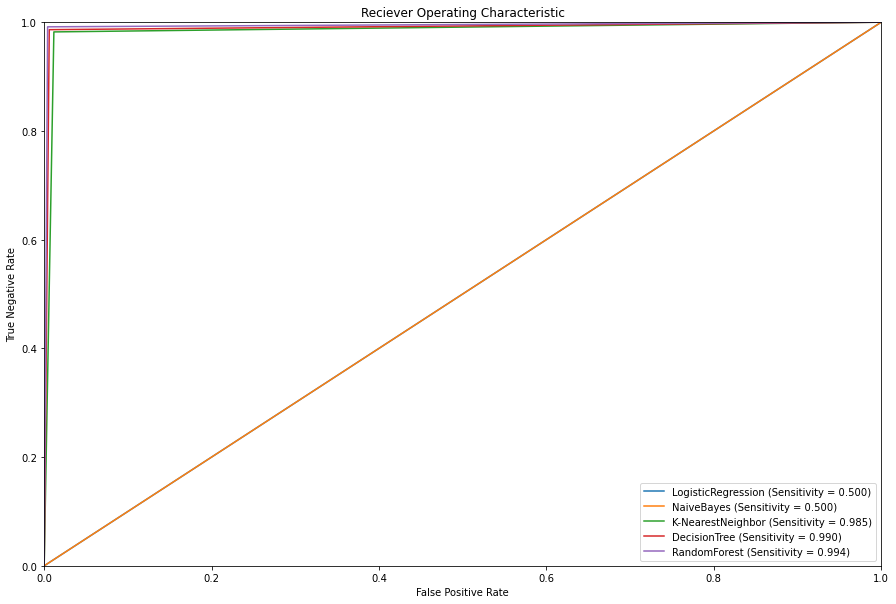

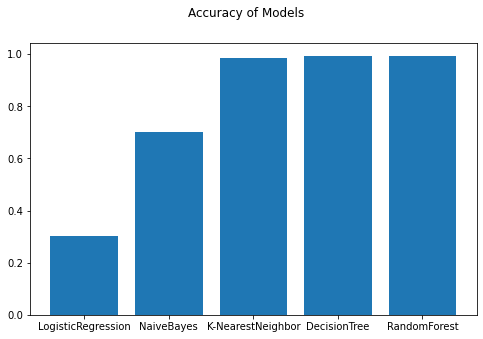

In [38]:
names = ['LogisticRegression', 'NaiveBayes', 'K-NearestNeighbor','DecisionTree','RandomForest']

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr1 , tpr1, thresholds = roc_curve(y_test,y_pred)
fpr2, tpr2, thresholds = roc_curve(y_test,y_pred1)
fpr3, tpr3, thresholds = roc_curve(y_test,y_pred2)
fpr4, tpr4, thresholds = roc_curve(y_test,y_pred3)
fpr5, tpr5, thresholds = roc_curve(y_test,y_pred4)

auc1 = roc_auc_score(y_test,y_pred)
auc2 = roc_auc_score(y_test,y_pred1)
auc3 = roc_auc_score(y_test,y_pred2)
auc4 = roc_auc_score(y_test,y_pred3)
auc5 = roc_auc_score(y_test,y_pred4)

fpr = [fpr1,fpr2,fpr3,fpr4,fpr5]
tpr = [tpr1,tpr2,tpr3,tpr4,tpr5]
auc = [auc1,auc2,auc3,auc4,auc5]

plt.figure(figsize=(15,10))
for i in range(0,5):
    plt.plot(fpr[i],tpr[i],label = '%s (Sensitivity = %.3f)'%(names[i],auc[i]))
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

acc = [0.3040202825063383,0.7021369069177834,0.9864904020282507,0.9914885910901847,0.9935892792466497]

plt.figure(figsize=(8,5))
plt.subplot()
plt.bar(names, acc)
plt.suptitle('Accuracy of Models')
plt.show()